Coefficient of determination:  0.6629656243624509
Intercept:  [-34.12315239]
Slope:  [[17.69126717 -4.2997206  19.93901606]]
Predicted values: 
[[22.62276039]
 [24.42319623]
 [34.64297338]
 [30.71920474]
 [36.05978154]
 [36.33450418]
 [34.05422515]
 [19.4339878 ]
 [29.47941691]
 [15.5999068 ]
 [33.04693466]
 [44.01489814]
 [50.944655  ]
 [14.90796038]
 [ 2.02499342]
 [ 6.37314901]
 [15.2587083 ]
 [24.86287786]
 [25.10979763]
 [27.35529961]
 [30.83112768]
 [10.36322738]
 [13.38818378]
 [25.15560405]
 [25.96686238]
 [13.27832905]
 [ 6.36465516]
 [16.02188276]
 [18.84681017]
 [28.77118486]
 [27.15462938]
 [19.32877154]
 [27.29187887]
 [25.57882329]]


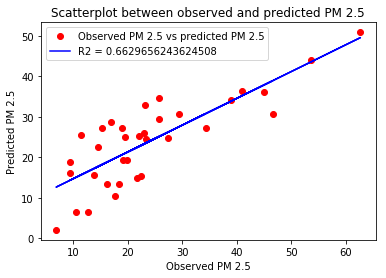

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

set_data = pd.read_excel('PM 2.5.xlsx', sheet_name = 'Sheet1')
X = set_data.iloc[1:36, 1:].values
y = set_data.iloc[1:36, :1].values

X = np.array(X)
y = np.array(y)

model = LinearRegression()
model.fit(X, y)

r_sq = model.score(X, y)
print('Coefficient of determination: ', r_sq)
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)


y_pred = model.predict(X)
print('Predicted values: ', y_pred, sep = '\n')
#np.savetxt('Predicted y.csv', x, delimiter = ', ')


mean_y = np.mean(y)
mean_y_pred = np.mean(y_pred)

SS_yy_pred = np.sum((y-mean_y)*(y_pred-mean_y_pred))
SS_yy = np.sum((y-mean_y)**2)

b_1 = SS_yy_pred/SS_yy
b_0 = mean_y_pred - b_1*mean_y

y_th = b_0 + b_1*y

SST = np.sum((y_pred-mean_y_pred)**2)
SSE = np.sum((y_pred - y_th)**2)

R2 = 1 - SSE/SST


plt.plot(y, y_pred, 'ro', label = 'Observed PM 2.5 vs predicted PM 2.5')
plt.plot(y, y_th, 'b', label = 'R2 = ' + str(R2))
plt.legend()
plt.title('Scatterplot between observed and predicted PM 2.5')
plt.xlabel('Observed PM 2.5')
plt.ylabel('Predicted PM 2.5')
plt.show()

Estimated coefficients:
b_0 = 0.24839892708576006 
b_1 = 3.2670433805062578
Mean of x =  1.5787973636302517 
Mean of y =  5.406398403094705
SSE =  29.633092308023667 
SST =  74.04299980663458
R2 =  0.5997853627566234


Estimated coefficients:
a_0 = 0.6530941888191015 
a_1 = 2.3518721717850313
Mean of i =  1.4508355601023601 
Mean of j =  4.065273968459992
SSE =  20.583863308407047 
SST =  50.478666872167445
R2 =  0.5922264872696861


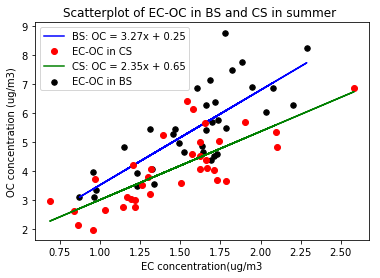

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def estimate_coefficients(x, y, i, j):
    #Calculate the x and y values
    n = np.size(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    SS_xy = np.sum((x-mean_x)* (y-mean_y))
    SS_xx = np.sum((x-mean_x)**2)
    b_1 = SS_xy/SS_xx
    b_0 = mean_y - b_1*mean_x
    
    
    #Calculate the i and j values
    n_ij = np.size(i)
    mean_i, mean_j = np.mean(i), np.mean(j)
    SS_ij = np.sum((i-mean_i)* (j-mean_j))
    SS_ii = np.sum((i-mean_i)**2)
    a_1 = SS_ij/SS_ii
    a_0 = mean_j - a_1*mean_i
       
    return (b_0, b_1, mean_x, mean_y, a_0, a_1, mean_i, mean_j)


def plot_regression_line(x, y, i, j, b):
    #Calculate predicted y values
    y_pred = b[0] + b[1]*x
    mean_x = b[2]
    mean_y = b[3]
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}". format(b[0], b[1]))
    print('Mean of x = ', mean_x, '\nMean of y = ', mean_y)
    SST_xy = np.sum((y-mean_y)**2)
    SSE_xy = np.sum((y-y_pred)**2)
    print('SSE = ', SSE_xy, '\nSST = ', SST_xy)
    R2_xy = 1 - SSE_xy/SST_xy
    print('R2 = ', R2_xy)
    
    #Calculate predicted j values
    j_pred = b[4] + b[5]*i
    mean_i = b[6]
    mean_j = b[7]
    print("\n\nEstimated coefficients:\na_0 = {} \na_1 = {}". format(b[4], b[5]))
    print('Mean of i = ', mean_i, '\nMean of j = ', mean_j)
    SST_ij = np.sum((j-mean_j)**2)
    SSE_ij = np.sum((j-j_pred)**2)
    print('SSE = ', SSE_ij, '\nSST = ', SST_ij)
    R2_ij = 1 - SSE_ij/SST_ij
    print('R2 = ', R2_ij)
    
    
    #Draw the plot of relationship between EC-OC in BS in summer time
    plt.scatter(x, y, color = "black", marker = "o", s = 30, label = 'EC-OC in BS')
    plt.plot(x, y_pred, color = "b", label = 'BS: OC = 3.27x + 0.25')
    plt.title ('Scatterplot of EC-OC in BS and CS in summer ' )
    plt.xlabel('EC concentration(ug/m3')
    plt.ylabel('OC concentration (ug/m3)')
    plt.legend()
    
    #Draw the plot of EC-OC relationship in CS during summer time
    plt.plot(i, j, 'ro', label = 'EC-OC in CS')
    plt.plot(i, j_pred, color = 'g', label = 'CS: OC = 2.35x + 0.65')
    plt.legend()

    plt.show()
    
    
    
def main():
    dataset_BS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'BS')
    x = dataset_BS.iloc[1:36, 20:21].values
    y = dataset_BS.iloc[1:36, 19:20].values
    dataset_CS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'CS')
    i = dataset_CS.iloc[0:35, 20:21].values
    j = dataset_CS.iloc[0:35, 19:20].values
    
    b = estimate_coefficients(x, y, i, j)
    
    plot_regression_line(x, y, i, j, b)
    
    
    
if __name__ == "__main__":
    main()

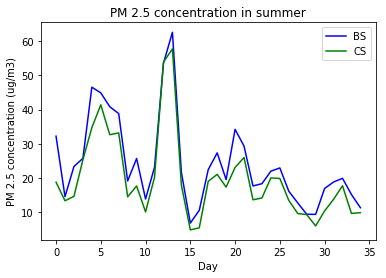

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

    
def main():
    dataset_BS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'BS')
    x = dataset_BS.iloc[1:36, 2:3].values
    dataset_CS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'CS')
    i = dataset_CS.iloc[0:35, 2:3].values
    
    plt.title('PM 2.5 concentration in summer')
    plt.plot(x, 'b', label = 'BS')
    plt.plot(i, 'g', label = 'CS')
    plt.legend()
    plt.xlabel ('Day')
    plt.ylabel('PM 2.5 concentration (ug/m3)')
    plt.show()

    
    
if __name__ == "__main__":
    main()

Estimated coefficients:
b_0 = 0.24839892708576006 
b_1 = 3.2670433805062578
Mean of x =  1.5787973636302517 
Mean of y =  5.406398403094705
SSE =  29.633092308023667 
SST =  74.04299980663458
R2 =  0.5997853627566234


Estimated coefficients:
a_0 = 0.6530941888191015 
a_1 = 2.3518721717850313
Mean of i =  1.4508355601023601 
Mean of j =  4.065273968459992
SSE =  20.583863308407047 
SST =  50.478666872167445
R2 =  0.5922264872696861


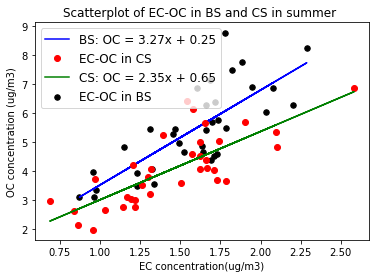

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 18 19:07:17 2019

@author: hueho
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl


def estimate_coefficients(x, y, i, j):
    #Calculate the x and y values
    n = np.size(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    SS_xy = np.sum((x-mean_x)* (y-mean_y))
    SS_xx = np.sum((x-mean_x)**2)
    b_1 = SS_xy/SS_xx
    b_0 = mean_y - b_1*mean_x
    
    
    #Calculate the i and j values
    n_ij = np.size(i)
    mean_i, mean_j = np.mean(i), np.mean(j)
    SS_ij = np.sum((i-mean_i)* (j-mean_j))
    SS_ii = np.sum((i-mean_i)**2)
    a_1 = SS_ij/SS_ii
    a_0 = mean_j - a_1*mean_i
       
    return (b_0, b_1, mean_x, mean_y, a_0, a_1, mean_i, mean_j)


def plot_regression_line(x, y, i, j, b):
    #Calculate predicted y values
    y_pred = b[0] + b[1]*x
    mean_x = b[2]
    mean_y = b[3]
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}". format(b[0], b[1]))
    print('Mean of x = ', mean_x, '\nMean of y = ', mean_y)
    SST_xy = np.sum((y-mean_y)**2)
    SSE_xy = np.sum((y-y_pred)**2)
    print('SSE = ', SSE_xy, '\nSST = ', SST_xy)
    R2_xy = 1 - SSE_xy/SST_xy
    print('R2 = ', R2_xy)
    
    #Calculate predicted j values
    j_pred = b[4] + b[5]*i
    mean_i = b[6]
    mean_j = b[7]
    print("\n\nEstimated coefficients:\na_0 = {} \na_1 = {}". format(b[4], b[5]))
    print('Mean of i = ', mean_i, '\nMean of j = ', mean_j)
    SST_ij = np.sum((j-mean_j)**2)
    SSE_ij = np.sum((j-j_pred)**2)
    print('SSE = ', SSE_ij, '\nSST = ', SST_ij)
    R2_ij = 1 - SSE_ij/SST_ij
    print('R2 = ', R2_ij)
    
    
    #Draw the plot of relationship between EC-OC in BS in summer time
    plt.scatter(x, y, color = "black", marker = "o", s = 30, label = 'EC-OC in BS')
    plt.plot(x, y_pred, color = "b", label = 'BS: OC = 3.27x + 0.25')
    plt.title ('Scatterplot of EC-OC in BS and CS in summer ' )
    plt.xlabel('EC concentration(ug/m3)')
    plt.ylabel('OC concentration (ug/m3)')
    plt.legend()
    #plt.
    
    #Draw the plot of EC-OC relationship in CS during summer time
    plt.plot(i, j, 'ro', label = 'EC-OC in CS')
    plt.plot(i, j_pred, color = 'g', label = 'CS: OC = 2.35x + 0.65')
    #plt.style.use('fivethirtyeight')
    #plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
    plt.legend(loc = 'upper left')
    mpl.rcParams['legend.fontsize']=12

    plt.show()
    
    
    
def main():
    dataset_BS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'BS')
    x = dataset_BS.iloc[1:36, 20:21].values
    y = dataset_BS.iloc[1:36, 19:20].values
    dataset_CS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'CS')
    i = dataset_CS.iloc[0:35, 20:21].values
    j = dataset_CS.iloc[0:35, 19:20].values
    
    b = estimate_coefficients(x, y, i, j)
    
    plot_regression_line(x, y, i, j, b)
    
    
    
if __name__ == "__main__":
    main()


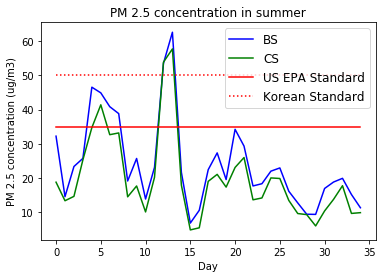

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 19 00:26:59 2019

@author: hueho
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

    
def main():
    dataset_BS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'BS')
    x = dataset_BS.iloc[1:36, 2:3].values
    dataset_CS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'CS')
    i = dataset_CS.iloc[0:35, 2:3].values
    
    plt.title('PM 2.5 concentration in summer')
    plt.plot(x, 'b', label = 'BS')
    plt.plot(i, 'g', label = 'CS')
    plt.legend()
    plt.xlabel ('Day')
    plt.ylabel('PM 2.5 concentration (ug/m3)')


    US_standard = []
    Korean_standard = []
    for a in range (35):
        b=35
        US_standard.append(b)
        c = 50
        Korean_standard.append(c)
   
    
    plt.plot(US_standard,'-r', label = 'US EPA Standard')
    plt.plot(Korean_standard,':r', label = 'Korean Standard')
    plt.legend()
    
    plt.show()
    
    
if __name__ == "__main__":
    main()


In [9]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 19 00:26:59 2019

@author: hueho
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

dataset_BS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'BS')
x = dataset_BS.iloc[1:36, 2:3].values
dataset_CS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'CS')
i = dataset_CS.iloc[0:35, 2:3].values
    
dataset = pd.read_excel('PM 2.5.xlsx', sheet_name = 'Sheet1')
d = dataset.iloc[1:36, 1:2].values
e = dataset.iloc[1:36, 2:3].values
f = dataset.iloc[1:36, 3:].values
    
#Calculate mean of WSOC, OC and EC
mean_d = np.mean(d)
mean_e = np.mean(e)
mean_f = np.mean(f)
    
#Calculate standard deviation of WSOC, OC and EC
d_std = np.std(d)
e_std = np.std(e)
f_std = np.std(f)
    
    
plt.subplot(211)
plt.title('PM 2.5 concentration in summer')
plt.plot(x, 'b', label = 'BS')
plt.plot(i, 'g', label = 'CS')
plt.legend()
plt.xlabel ('Day')
plt.ylabel('PM 2.5 concentration (ug/m3)')


US_standard = []
Korean_standard = []
for a in range (35):
    b=35
    US_standard.append(b)
    c = 50
    Korean_standard.append(c)
    
plt.plot(arr, US_standard,'-r', label = 'US EPA Standard')
plt.plot(arr, Korean_standard,':r', label = 'Korean Standard')
plt.legend()
    
plt.subplot(212)
object = ['WSOC', 'OC', 'EC']
n_pos = np.arange(len(object))
values = [mean_d, mean_e, mean_f]
error = [d_std, e_std, f_std]
    
fig, ax = plt.subplot()
ax.bar(n_pos, values, yerr=error, align = 'center', alpha = 0.5, ecolor='black', capsize=10)
ax.set_ylabel('Concentration')
ax.set_xticks(n_pos)
ax.set_xticklabels(object)
ax.set_title('Temporal profiles of WSOC, OC and EC in PM 2.5')
ax.yaxis.grid(True)
    
plt.tight_layout()
plt.show()
    

IndentationError: unexpected indent (<ipython-input-9-0c073b4a9435>, line 13)

TypeError: cannot create weak reference to 'bool' object

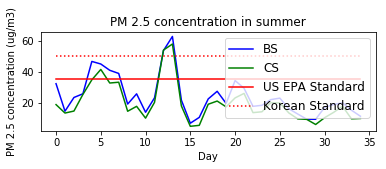

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

dataset_BS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'BS')
x = dataset_BS.iloc[1:36, 2:3].values
dataset_CS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'CS')
i = dataset_CS.iloc[0:35, 2:3].values
    
dataset = pd.read_excel('PM 2.5.xlsx', sheet_name = 'Sheet1')
d = dataset.iloc[1:36, 1:2].values
e = dataset.iloc[1:36, 2:3].values
f = dataset.iloc[1:36, 3:].values
    
#Calculate mean of WSOC, OC and EC
mean_d = np.mean(d)
mean_e = np.mean(e)
mean_f = np.mean(f)
    
#Calculate standard deviation of WSOC, OC and EC
d_std = np.std(d)
e_std = np.std(e)
f_std = np.std(f)
    
    
plt.subplot(211)
plt.title('PM 2.5 concentration in summer')
plt.plot(x, 'b', label = 'BS')
plt.plot(i, 'g', label = 'CS')
plt.legend()
plt.xlabel ('Day')
plt.ylabel('PM 2.5 concentration (ug/m3)')


US_standard = []
Korean_standard = []
for a in range (35):
    b=35
    US_standard.append(b)
    c = 50
    Korean_standard.append(c)
    
plt.plot(US_standard,'-r', label = 'US EPA Standard')
plt.plot(Korean_standard,':r', label = 'Korean Standard')
plt.legend()
    
object = ['WSOC', 'OC', 'EC']
n_pos = np.arange(len(object))
values = [mean_d, mean_e, mean_f]
error = [d_std, e_std, f_std]
    
fig, ax = plt.subplot()
ax.bar(n_pos, values, yerr=error, align = 'center', alpha = 0.5, ecolor='black', capsize=10)
ax.set_ylabel('Concentration')
ax.set_xticks(n_pos)
ax.set_xticklabels(object)
ax.set_title('Temporal profiles of WSOC, OC and EC in PM 2.5')
ax.yaxis.grid(True)
    
plt.tight_layout()
plt.show()
    

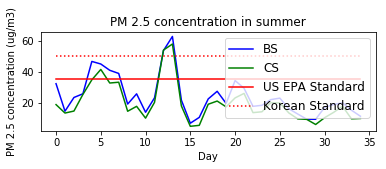

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

 
def main():
    dataset_BS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'BS')
    x = dataset_BS.iloc[1:36, 2:3].values
    dataset_CS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'CS')
    i = dataset_CS.iloc[0:35, 2:3].values
      
    plt.subplot(211)
    plt.title('PM 2.5 concentration in summer')
    plt.plot(x, 'b', label = 'BS')
    plt.plot(i, 'g', label = 'CS')
    plt.legend()
    plt.xlabel ('Day')
    plt.ylabel('PM 2.5 concentration (ug/m3)')


    US_standard = []
    Korean_standard = []
    for a in range (35):
        b=35
        US_standard.append(b)
        c = 50
        Korean_standard.append(c)
    
    plt.plot(US_standard,'-r', label = 'US EPA Standard')
    plt.plot(Korean_standard,':r', label = 'Korean Standard')
    plt.legend()
    
    plt.show()
     
    
if __name__ == "__main__":
    main()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

 
def main():
     
    dataset = pd.read_excel('PM 2.5.xlsx', sheet_name = 'Sheet1')
    d = dataset.iloc[1:36, 1:2].values
    e = dataset.iloc[1:36, 2:3].values
    f = dataset.iloc[1:36, 3:].values
    
    #Calculate mean of WSOC, OC and EC
    mean_d = np.mean(d)
    mean_e = np.mean(e)
    mean_f = np.mean(f)
    
    #Calculate standard deviation of WSOC, OC and EC
    d_std = np.std(d)
    e_std = np.std(e)
    f_std = np.std(f)
    
    object = ['WSOC', 'OC', 'EC']
    n_pos = np.arange(len(object))
    values = [mean_d, mean_e, mean_f]
    error = [d_std, e_std, f_std]
    
    fig, ax = plt.subplot(21)
    ax.bar(n_pos, values, yerr=error, align = 'center', alpha = 0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Concentration')
    ax.set_xticks(n_pos)
    ax.set_xticklabels(object)
    ax.set_title('Temporal profiles of WSOC, OC and EC in PM 2.5')
    ax.yaxis.grid(True)
    
    plt.tight_layout()
    plt.show()
      
    
    
if __name__ == "__main__":
    main()

ValueError: Integer subplot specification must be a three-digit number, not 21

<Figure size 432x288 with 0 Axes>

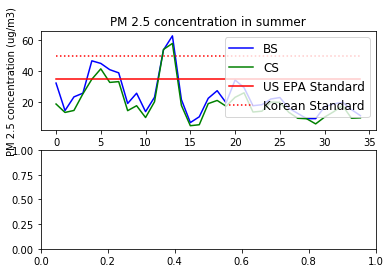

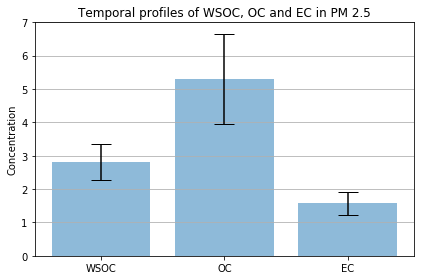

In [23]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 19 00:26:59 2019

@author: hueho
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

 
def main():
    dataset_BS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'BS')
    x = dataset_BS.iloc[1:36, 2:3].values
    dataset_CS = pd.read_excel('PM 2.5.xlsx', sheet_name = 'CS')
    i = dataset_CS.iloc[0:35, 2:3].values
    
    dataset = pd.read_excel('PM 2.5.xlsx', sheet_name = 'Sheet1')
    d = dataset.iloc[1:36, 1:2].values
    e = dataset.iloc[1:36, 2:3].values
    f = dataset.iloc[1:36, 3:].values
    
    #Calculate mean of WSOC, OC and EC
    mean_d = np.mean(d)
    mean_e = np.mean(e)
    mean_f = np.mean(f)
    
    #Calculate standard deviation of WSOC, OC and EC
    d_std = np.std(d)
    e_std = np.std(e)
    f_std = np.std(f)
    
    
    plt.subplot(211)
    plt.title('PM 2.5 concentration in summer')
    plt.plot(x, 'b', label = 'BS')
    plt.plot(i, 'g', label = 'CS')
    plt.legend()
    plt.xlabel ('Day')
    plt.ylabel('PM 2.5 concentration (ug/m3)')


    US_standard = []
    Korean_standard = []
    for a in range (35):
        b=35
        US_standard.append(b)
        c = 50
        Korean_standard.append(c)
    
    plt.plot(US_standard,'-r', label = 'US EPA Standard')
    plt.plot(Korean_standard,':r', label = 'Korean Standard')
    plt.legend()
    
    plt.subplot(212)
    object = ['WSOC', 'OC', 'EC']
    n_pos = np.arange(len(object))
    values = [mean_d, mean_e, mean_f]
    error = [d_std, e_std, f_std]
    
    fig, ax = plt.subplots()
    ax.bar(n_pos, values, yerr=error, align = 'center', alpha = 0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Concentration')
    ax.set_xticks(n_pos)
    ax.set_xticklabels(object)
    ax.set_title('Temporal profiles of WSOC, OC and EC in PM 2.5')
    ax.yaxis.grid(True)
    
    plt.tight_layout()
    plt.show()  
    
    
    
if __name__ == "__main__":
    main()
    

Coefficients: 
 [[20.53828759 -5.04583782 20.64460798]]
Variance score: 0.5322797911214476


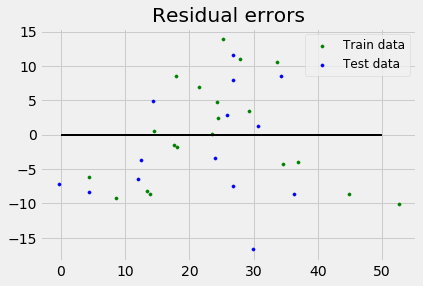

In [24]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
import pandas as pd
  

set_data = pd.read_excel('PM 2.5.xlsx', sheet_name = 'Sheet1')

X = set_data.iloc[1:36, 1:].values
y = set_data.iloc[1:36, :1].values
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [4]:
           
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    #applying the sigmoid function
    return 1 / (1 + np.exp(-x))

if __name__ == "__main__":
    
    dataset = pd.read_excel('dataset_neural network.xlsx', sheet_name ='Sheet2')
    A = dataset.iloc[1:, :1].values
    B = dataset.iloc[1:, 1:2].values
    C = dataset.iloc[1:, 2:3].values
    
    n = 2.6
    number_of_epoch = 800



    number_of_nodes = 8
    W = np.random.random(number_of_nodes, len(A(1,:)))
    U = np.random.random(len(B(1,:)), number_of_nodes)
    
    i = 0;
    j = len(A)
    
    
    while m < number_of_epoch:
        m += 1
        
        for a = 1 in range(e):
            I = A(i,:)
            D = B(i,:)
            
            
            H = sigmoid(W*I)
            O = sigmoid(U*H)
            
            delta_a = O*np.dot(1-O,D-O)
            
            delta_b = H*np.dot(1-H, U.T*delta_a)
            
            U = U + n*np.dot(delta_a, H.T)
            W = W + n*np.dot(delta_b, I.T)
    
    RMS_err = 0
    
    for a = 1 in range(e):
        D = A(i,:).T
        I = B(i,:).T
        RMS_err = RMS_err + np.linalg.norm(D-sigmoid(U*sigmoid(W*I)), 2)
    
    y = RMW_err/e
    
    plt.plot(m, log(y))
            

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 34)